In [2]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv('./data/paper_ratings.csv', delimiter=',')

print(raw_df)

             title country_association  \
0      AP_paper_41         Switzerland   
1      AP_paper_41         Switzerland   
2      AP_paper_41         Switzerland   
3      AP_paper_41             England   
4      AP_paper_41             England   
...            ...                 ...   
1645  AT_paper_111             Germany   
1646  AT_paper_111             Germany   
1647  AT_paper_111        South Africa   
1648  AT_paper_111        South Africa   
1649  AT_paper_111        South Africa   

                            university_association  Originality  Method  \
0                                       ETH Zurich         10.0    10.0   
1                           University of Lausanne          9.0     8.0   
2     Zurich University of Applied Sciences (ZHAW)         10.0    10.0   
3                          University of Cambridge          9.0    10.0   
4                             University of Dundee          9.0     9.0   
...                                          

In [4]:
university_considered = ["University of Sao Paulo", "University of Houston", "University of Delhi", "ETH Zurich", "Sharif University of Technology", "Massachusetts Institute of Technology", "University of Potsdam", "Peking University"]
for university in university_considered:
    current = raw_df[raw_df['university_association'] == university].drop(raw_df.columns[[0,1,2]], axis=1)
    current_mean_values = current.mean()
    current_median_values = current.median()
    current_sd_values = current.std()
    current_se_values = current.std() / np.sqrt(current.count())
    
    summary_stats = pd.DataFrame({
        'Mean': current_mean_values,
        'Median': current_median_values,
        'Standard Deviation': current_sd_values,
        'Standard Error': current_se_values
    })
    print(f"{university}:")
    print(summary_stats)
    print("\n")

University of Delhi:
                                               Mean  Median  \
Originality                                8.714286     9.0   
Method                                     8.918367     9.0   
Credibility                                8.408163     9.0   
Understandability                          8.326531     8.0   
Relevance                                  8.979592     9.0   
Quality of Citations                       8.571429     9.0   
Linguistic style and soundness of grammar  8.938776     9.0   
Overall score                              8.535918     8.5   

                                           Standard Deviation  Standard Error  
Originality                                          0.790569        0.112938  
Method                                               0.702280        0.100326  
Credibility                                          0.839602        0.119943  
Understandability                                    0.800722        0.114389  
Relevance  

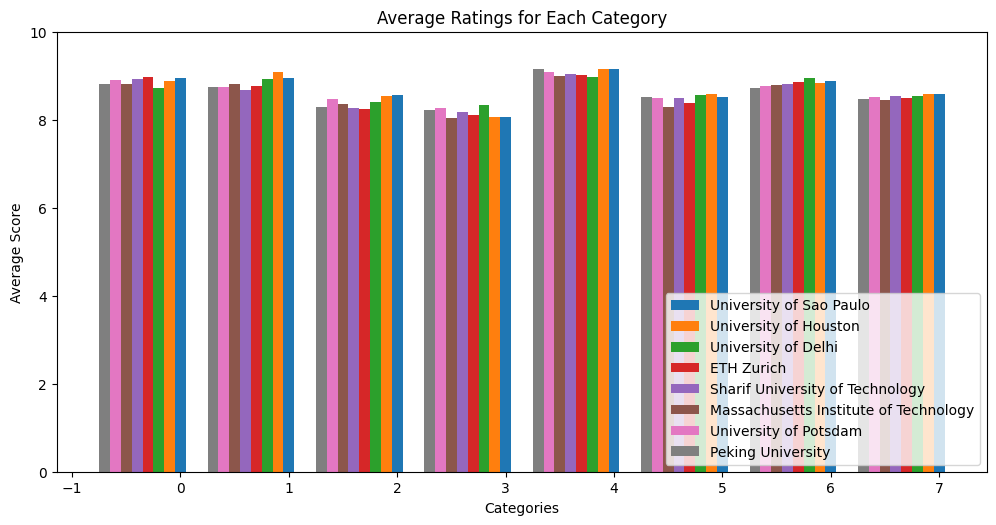

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 40))

num_categories = 8

positions = np.arange(num_categories)

bar_width = 0.1
university_considered = ["University of Sao Paulo", "University of Houston", "University of Delhi", "ETH Zurich", "Sharif University of Technology", "Massachusetts Institute of Technology", "University of Potsdam", "Peking University"]
plt.subplot(6, 1, 1)
for i,university in enumerate(university_considered):
    average_score = raw_df[raw_df['university_association'] == university].drop(raw_df.columns[[0,1,2]], axis=1).mean()
    plt.bar(positions - i*(0.1), average_score.values, bar_width, label=university)
plt.title('Average Ratings for Each Category')
plt.ylabel('Average Score')
plt.xlabel('Categories')
plt.legend(loc="lower right")
plt.ylim(0, 10)

plt.show()